In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sciStat
import sussix


---
# LHC tracking data
---

The following spectra (100 spectral lines each) are from LHC tracking data (No BB, but x-y coupling and strong 450 A arc octupoles). They accurately represent the x-px tracjectory for 10k turns and are intended to be used as realistic example trajectories (validated manually).

In [2]:

particles = []
for file in ['data/LHC_particle_1sigma.csv',
             'data/LHC_particle_4sigma.csv',
             'data/LHC_particle_8sigma.csv']:
    
    # Loading file
    df = pd.read_csv(file,index_col=0)
    df = df.astype({'amplitude':np.complex128,'frequency':np.float64})

    # Recreating the signal
    nturns = int(1e4)
    x,px = sussix.analysis.generate_signal(df.amplitude,df.frequency,np.arange(int(nturns)))

    particles.append({'x':x,'px':px,'df':df})

---
# Plotting the particles
---

(-10.0, 10.0)

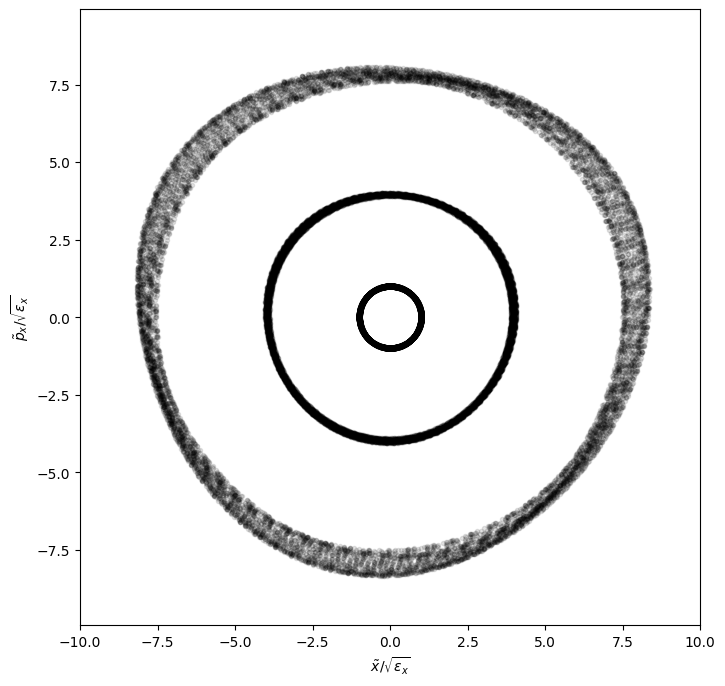

In [3]:
plt.figure(figsize=(8,8))
for part in particles:
    plt.plot(part['x'],part['px'],'.',color='k',alpha=0.1)


plt.axis('equal')
plt.xlabel(rf'$\tilde x/\sqrt{{\varepsilon_x}}$')
plt.ylabel(rf'$\tilde p_x/\sqrt{{\varepsilon_x}}$')
plt.xlim(-10,10)
plt.ylim(-10,10)


---
# Extracting the tune
---

In [4]:
for part,sigma in zip(particles,[1,4,8]):
    print(40*'-')
    print(f'Particle @ {sigma} sigma:')
    print(f'x only: {sussix.get_tune(part["x"],Hann_order=2)}')
    print(f'x-px  : {sussix.get_tune(part["x"],part["px"],Hann_order=2)}')

----------------------------------------
Particle @ 1 sigma:
x only: 0.3100208433909699
x-px  : 0.3100208433909691
----------------------------------------
Particle @ 4 sigma:
x only: 0.31031972329631624
x-px  : 0.3103197232963153
----------------------------------------
Particle @ 8 sigma:
x only: 0.3112651936705573
x-px  : 0.3112651936705533


---
# Full phase space analysis
---

(-10.0, 10.0)

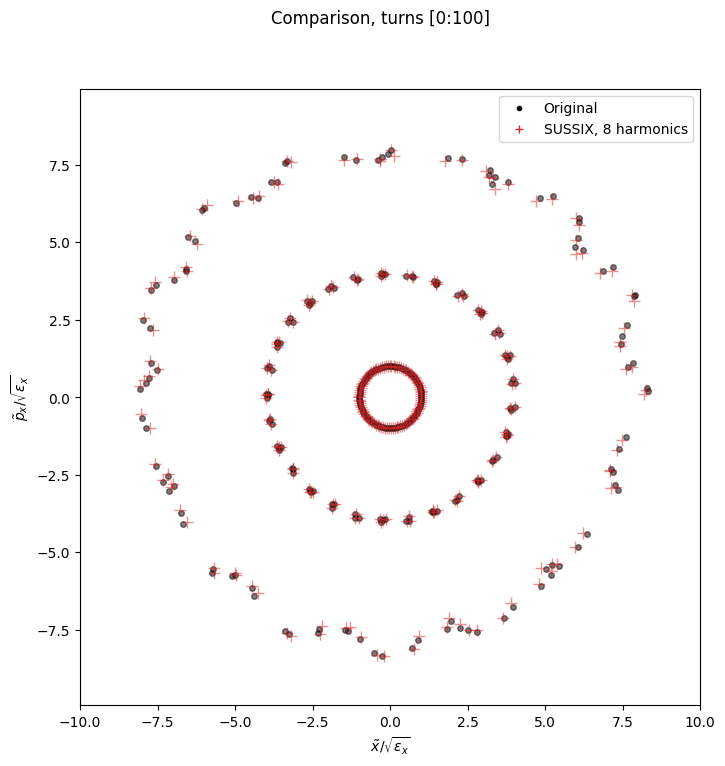

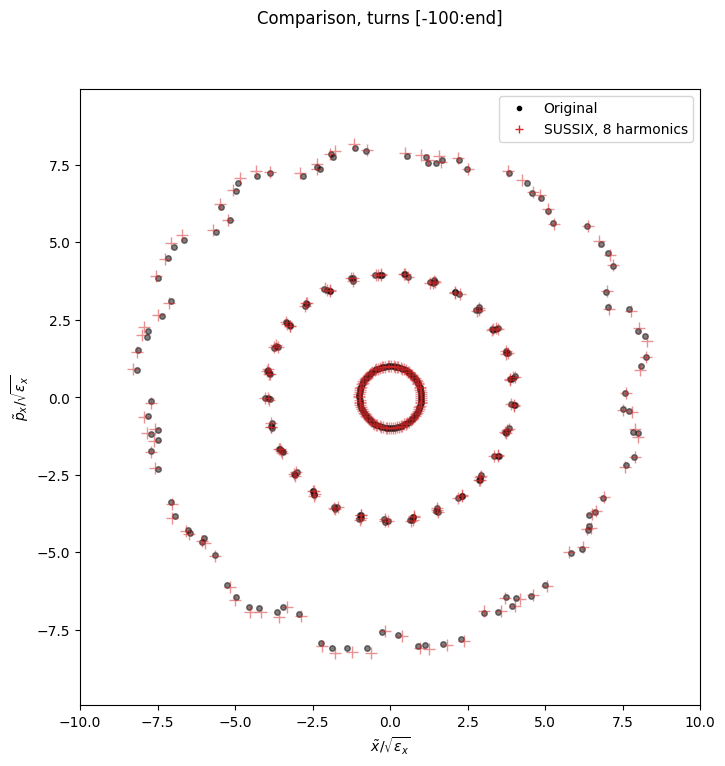

In [5]:
#-----------------------------
# PARAMETERS
n_harm = 8
nturns = 100
#-----------------------------


plt.figure(figsize=(8,8))
plt.suptitle(f'Comparison, turns [0:{nturns}]')
for part in particles:
    spectrum = sussix.get_spectrum(part['x'],part['px'],number_of_harmonics = n_harm,Hann_order=2)
    x_r,px_r = sussix.analysis.generate_signal(spectrum.amplitude,spectrum.frequency,np.arange(len(x)))

    plt.plot(part['x'][:nturns],part['px'][:nturns] ,'.',ms=8,color='k'  ,alpha=0.5)
    plt.plot(x_r[:nturns],px_r[:nturns]             ,'+',ms=8,color='C3' ,alpha=0.5)

plt.plot(np.nan,np.nan,'.',color='k' ,label='Original')
plt.plot(np.nan,np.nan,'+',color='C3',label=f'SUSSIX, {n_harm} harmonics')
plt.legend()
plt.axis('equal')
plt.xlabel(rf'$\tilde x/\sqrt{{\varepsilon_x}}$')
plt.ylabel(rf'$\tilde p_x/\sqrt{{\varepsilon_x}}$')
plt.xlim(-10,10)
plt.ylim(-10,10)


plt.figure(figsize=(8,8))
plt.suptitle(f'Comparison, turns [-{nturns}:end]')
for part in particles:
    spectrum = sussix.get_spectrum(part['x'],part['px'],number_of_harmonics = n_harm,Hann_order=2)
    x_r,px_r = sussix.analysis.generate_signal(spectrum.amplitude,spectrum.frequency,np.arange(len(x)))

    plt.plot(part['x'][-nturns:],part['px'][-nturns:] ,'.',ms=8,color='k'  ,alpha=0.5)
    plt.plot(x_r[-nturns:],px_r[-nturns:]             ,'+',ms=8,color='C3' ,alpha=0.5)

plt.plot(np.nan,np.nan,'.',color='k' ,label='Original')
plt.plot(np.nan,np.nan,'+',color='C3',label=f'SUSSIX, {n_harm} harmonics')
plt.legend()
plt.axis('equal')
plt.xlabel(rf'$\tilde x/\sqrt{{\varepsilon_x}}$')
plt.ylabel(rf'$\tilde p_x/\sqrt{{\varepsilon_x}}$')
plt.xlim(-10,10)
plt.ylim(-10,10)



---
# Position ONLY analysis
---


Text(0, 0.5, '$\\tilde x/\\sqrt{\\varepsilon_x}$')

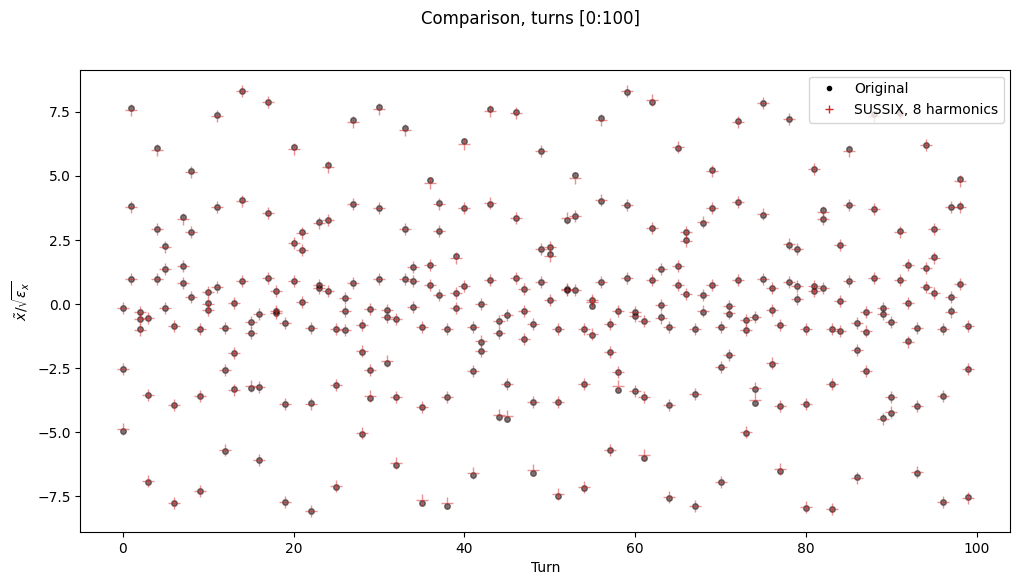

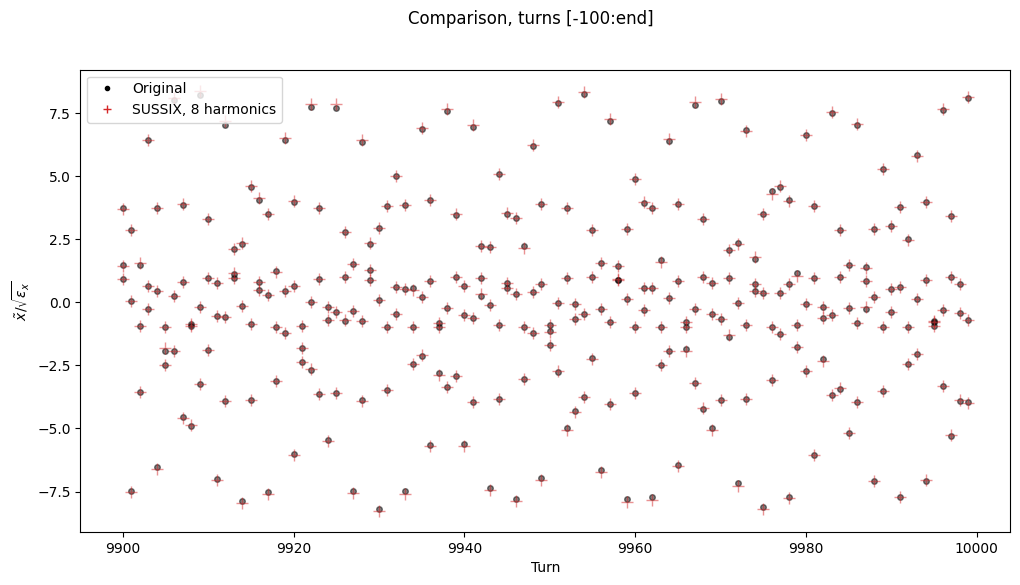

In [6]:

plt.figure(figsize=(12,6))
plt.suptitle(f'Comparison, turns [0:{nturns}]')
for part in particles:
    spectrum = sussix.get_spectrum(part['x'],number_of_harmonics = n_harm,Hann_order=2)
    x_r, _   = sussix.analysis.generate_signal(spectrum.amplitude,spectrum.frequency,np.arange(len(x)))

    plt.plot(np.arange(0,nturns),part['x'][:nturns] ,'.',ms=8,color='k'  ,alpha=0.5)
    plt.plot(np.arange(0,nturns),x_r[:nturns]             ,'+',ms=8,color='C3' ,alpha=0.5)

plt.plot(np.nan,np.nan,'.',color='k' ,label='Original')
plt.plot(np.nan,np.nan,'+',color='C3',label=f'SUSSIX, {n_harm} harmonics')
plt.legend()
plt.xlabel(rf'Turn')
plt.ylabel(rf'$\tilde x/\sqrt{{\varepsilon_x}}$')


plt.figure(figsize=(12,6))
plt.suptitle(f'Comparison, turns [-{nturns}:end]')
for part in particles:
    spectrum = sussix.get_spectrum(part['x'],number_of_harmonics = n_harm,Hann_order=2)
    x_r, _   = sussix.analysis.generate_signal(spectrum.amplitude,spectrum.frequency,np.arange(len(x)))

    plt.plot(np.arange(int(1e4-nturns),int(1e4)),part['x'][-nturns:] ,'.',ms=8,color='k'  ,alpha=0.5)
    plt.plot(np.arange(int(1e4-nturns),int(1e4)),x_r[-nturns:]             ,'+',ms=8,color='C3' ,alpha=0.5)

plt.plot(np.nan,np.nan,'.',color='k' ,label='Original')
plt.plot(np.nan,np.nan,'+',color='C3',label=f'SUSSIX, {n_harm} harmonics')
plt.legend()
plt.xlabel(rf'Turn')
plt.ylabel(rf'$\tilde x/\sqrt{{\varepsilon_x}}$')


---
# Spectrum comparison
---

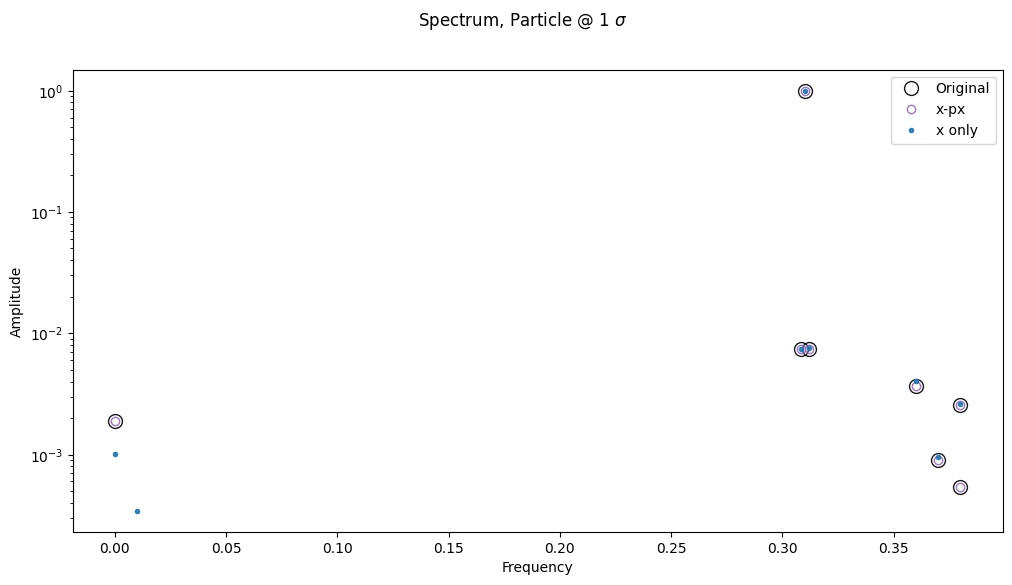

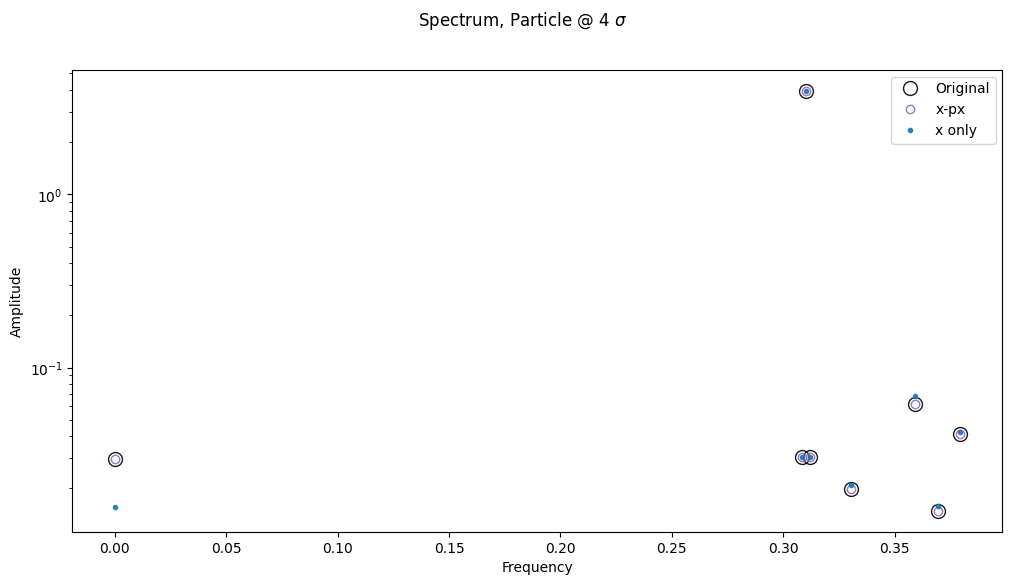

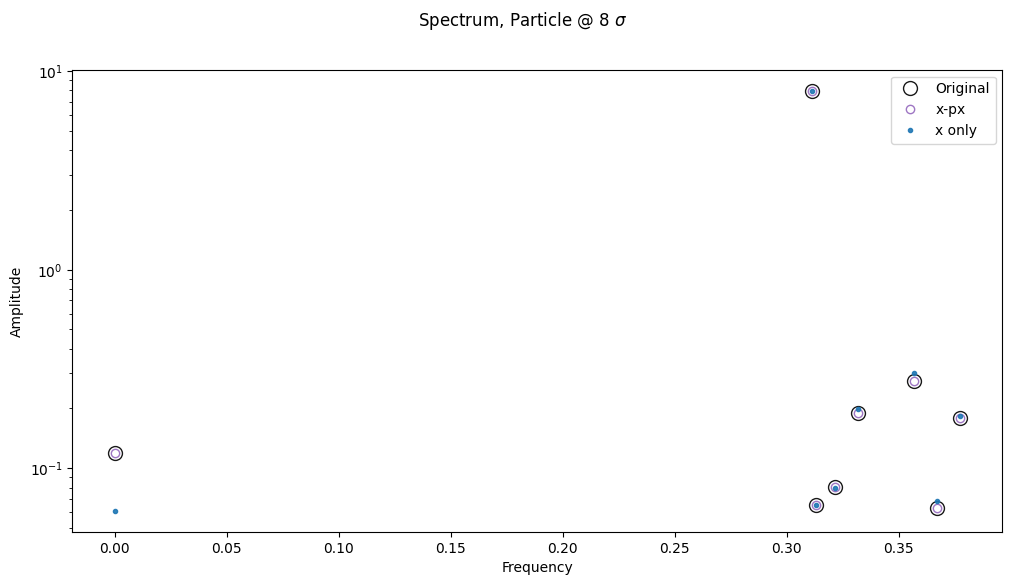

In [7]:

for part,sigma in zip(particles,[1,4,8]):
    plt.figure(figsize=(12,6))
    plt.suptitle(f'Spectrum, Particle @ {sigma} $\sigma$')
    spectrum_x    = sussix.get_spectrum(part['x']           ,number_of_harmonics = n_harm,Hann_order=2)
    spectrum_x_px = sussix.get_spectrum(part['x'],part['px'],number_of_harmonics = n_harm,Hann_order=2)

    plt.plot( np.abs(part['df'].frequency[:n_harm]),np.abs(part['df'].amplitude[:n_harm]),'o',ms=10,mfc='none',   color='black' ,alpha=0.9,label='Original')
    plt.plot( np.abs(spectrum_x_px.frequency),np.abs(spectrum_x_px.amplitude),'o',mfc='none',   color='C4' ,alpha=0.9,label='x-px')
    plt.plot( np.abs(spectrum_x.frequency)   ,np.abs(spectrum_x.amplitude),'.'   ,                    color='C0' ,alpha=0.9,label='x only')

    plt.legend()
    plt.yscale('log')
    plt.xlabel(rf'Frequency')
    plt.ylabel(rf'Amplitude')
    